In [1]:
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Afficher la liste des jeux de données disponibles
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
df = sns.load_dataset("car_crashes")

In [3]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [4]:
lr = LinearRegression()
svr = svm.SVR(kernel="linear")
knn = KNeighborsRegressor()
sgd = SGDRegressor()

In [62]:
X = df[['speeding', 'alcohol', 'not_distracted', 'no_previous']]
y = df["total"]

In [6]:
lr.fit(X, y)
svr.fit(X, y)
knn.fit(X, y)
sgd.fit(X, y)

SGDRegressor()

In [7]:
print(lr.score(X, y))
print(svr.score(X, y))
print(knn.score(X, y))
print(sgd.score(X, y))

0.9561822578077731
0.9485379600593963
0.9235115355853651
-45.35665695899509


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)
knn.fit(X_train, y_train)
sgd.fit(X_train, y_train)

SGDRegressor()

In [13]:
print(lr.score(X_train, y_train))
print(svr.score(X_train, y_train))
print(knn.score(X_train, y_train))
print(sgd.score(X_train, y_train))

0.9684904125617236
0.966050404369203
0.9270480928755817
0.3378238202128043


In [14]:
print(lr.score(X_test, y_test))
print(svr.score(X_test, y_test))
print(knn.score(X_test, y_test))
print(sgd.score(X_test, y_test))

0.8893938195158664
0.8424392253906061
0.76085304331932
0.051352383973905735


### optimisation des parametres

In [67]:
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
df = sns.load_dataset("car_crashes")
lr = LinearRegression()
svr = svm.SVR(kernel="linear")
knn = KNeighborsRegressor()
sgd = SGDRegressor()
X = df[['speeding', 'alcohol', 'not_distracted', 'no_previous']]
y = df["total"]
lr = LinearRegression()
svr = svm.SVR(kernel="linear")
knn = KNeighborsRegressor()
sgd = SGDRegressor()

lr.fit(X, y)
svr.fit(X, y)
knn.fit(X, y)
sgd.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)
knn.fit(X_train, y_train)
sgd.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(svr.score(X_train, y_train))
print(knn.score(X_train, y_train))
print(sgd.score(X_train, y_train))

0.9684904125617236
0.966050404369203
0.9270480928755817
-33.16095848580862


In [68]:
#  par defaut k=5 et la distance est milkoski par feaut
k = range(1, 10)
distance = ["minkowski", "manhattan", "euclidian"]
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i).fit(X, y)
    print(f"pour nombre voisins: {i} le score {knn.score(X, y)}")

pour nombre voisins: 1 le score 1.0
pour nombre voisins: 2 le score 0.965593350997535
pour nombre voisins: 3 le score 0.9564943637656139
pour nombre voisins: 4 le score 0.9354316208443735
pour nombre voisins: 5 le score 0.9235115355853651
pour nombre voisins: 6 le score 0.9196223430609538
pour nombre voisins: 7 le score 0.9050171143542584
pour nombre voisins: 8 le score 0.8922406750844742
pour nombre voisins: 9 le score 0.8813797994842982


In [95]:
# defaut k=5 et la distance est milkoski par feaut
fit_intercepts = [False, True]
score_max = [-np.inf,  ""]
score_train = []
score_test = []
distance = ["minkowski", "manhattan", "euclidian"]
# for i in k:
for param in fit_intercepts:
    lr = LinearRegression(fit_intercept=param).fit(X, y)
    print(f"TRAIN le score du modele {lr} est {
        lr.score(X_train, y_train):.2f}")
    print(f"TEST le score du modele {lr} est {
            lr.score(X_test, y_test):.2f}")
    score_train.append(knn.score(X_train, y_train))
    score_test.append(knn.score(X_test, y_test))
    if lr.score(X_train, y_train) > score_max[0] :
        score_max = [lr.score(X_train, y_train),  param]
print(f"le score max est {score_max[0]:.2f} avec  et le param fit_intercept= {lr.fit_intercept}")

TRAIN le score du modele LinearRegression(fit_intercept=False) est 0.96
TEST le score du modele LinearRegression(fit_intercept=False) est 0.91
TRAIN le score du modele LinearRegression() est 0.97
TEST le score du modele LinearRegression() est 0.92
le score max est 0.97 avec  et le param fit_intercept= True


In [103]:
# defaut k=5 et la distance est milkoski par feaut
k = range(1, 10)
score_max = [-np.inf, -1]
score_train = []
score_test = []
distance = ["minkowski", "manhattan", "euclidian"]
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i).fit(X, y)
    print(f"TRAIN le score du modele {knn} est {
          knn.score(X_train, y_train):.2f}")
    print(f"TEST le score du modele {knn} est {knn.score(X_test, y_test):.2f}")
    score_train.append(knn.score(X_train, y_train))
    score_test.append(knn.score(X_test, y_test))
    if knn.score(X_train, y_train) > score_max[0] and i != 1:
        score_max = [knn.score(X_train, y_train), i]
print(f"le score max est {score_max[0]:.2f} avec k={score_max[1]}")

TRAIN le score du modele KNeighborsRegressor(n_neighbors=1) est 1.00
TEST le score du modele KNeighborsRegressor(n_neighbors=1) est 1.00
TRAIN le score du modele KNeighborsRegressor(n_neighbors=2) est 0.97
TEST le score du modele KNeighborsRegressor(n_neighbors=2) est 0.94
TRAIN le score du modele KNeighborsRegressor(n_neighbors=3) est 0.97
TEST le score du modele KNeighborsRegressor(n_neighbors=3) est 0.92
TRAIN le score du modele KNeighborsRegressor(n_neighbors=4) est 0.95
TEST le score du modele KNeighborsRegressor(n_neighbors=4) est 0.88
TRAIN le score du modele KNeighborsRegressor() est 0.94
TEST le score du modele KNeighborsRegressor() est 0.86
TRAIN le score du modele KNeighborsRegressor(n_neighbors=6) est 0.93
TEST le score du modele KNeighborsRegressor(n_neighbors=6) est 0.87
TRAIN le score du modele KNeighborsRegressor(n_neighbors=7) est 0.92
TEST le score du modele KNeighborsRegressor(n_neighbors=7) est 0.84
TRAIN le score du modele KNeighborsRegressor(n_neighbors=8) est 0.9

In [84]:
# defaut k=5 et la distance est milkoski par feaut
k = range(1, 10)
score_max = [-np.inf, -1, ""]
score_train = []
score_test = []
distances = ["minkowski", "manhattan", "euclidean"]
for i in k:
    for distance in distances:
        knn = KNeighborsRegressor(n_neighbors=i, metric=distance).fit(X, y)
        print(f"TRAIN le score du modele {knn} est {
            knn.score(X_train, y_train):.2f}")
        print(f"TEST le score du modele {knn} est {
              knn.score(X_test, y_test):.2f}")
        score_train.append(knn.score(X_train, y_train))
        score_test.append(knn.score(X_test, y_test))
        if knn.score(X_train, y_train) > score_max[0] and i != 1:
            score_max = [knn.score(X_train, y_train), i, distance]
print(f"le score max est {score_max[0]:.2f} avec k={
      score_max[1]} et une distance de {score_max[2]}")

TRAIN le score du modele KNeighborsRegressor(n_neighbors=1) est 1.00
TEST le score du modele KNeighborsRegressor(n_neighbors=1) est 1.00
TRAIN le score du modele KNeighborsRegressor(metric='manhattan', n_neighbors=1) est 1.00
TEST le score du modele KNeighborsRegressor(metric='manhattan', n_neighbors=1) est 1.00
TRAIN le score du modele KNeighborsRegressor(metric='euclidean', n_neighbors=1) est 1.00
TEST le score du modele KNeighborsRegressor(metric='euclidean', n_neighbors=1) est 1.00
TRAIN le score du modele KNeighborsRegressor(n_neighbors=2) est 0.97
TEST le score du modele KNeighborsRegressor(n_neighbors=2) est 0.94
TRAIN le score du modele KNeighborsRegressor(metric='manhattan', n_neighbors=2) est 0.98
TEST le score du modele KNeighborsRegressor(metric='manhattan', n_neighbors=2) est 0.97
TRAIN le score du modele KNeighborsRegressor(metric='euclidean', n_neighbors=2) est 0.97
TEST le score du modele KNeighborsRegressor(metric='euclidean', n_neighbors=2) est 0.94
TRAIN le score du 

Créer une fonction qui teste différentes valeurs pour les hyperparamètres de 3 modèles et stocke les résultats dans un dataframe trier selon le score le plus élevé. Les données auront été splitée entre un train et test set. La fonction prend en paramètre des données X et y.

In [ ]:
# KNeighborsRegressor1 :

# n_neighbors :
# Nombre de voisins à utiliser par défaut pour les requêtes de voisins.
# weights : Fonction de poids utilisée dans la prédiction.  ‘uniform’ 'distance’

# SGDRegressor2 :
# loss : La fonction de perte à utiliser.‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’.
# penalty : Le terme de pénalité (également appelé terme de régularisation) à utiliser. Les valeurs possibles sont ‘l2’, ‘l1’, ‘elasticnet’ et None.

# LinearRegression3 :
# fit_intercept : False ou True Indique s’il faut calculer l’ordonnée à l’origine pour ce modèle. Si False, aucune ordonnée à l’origine ne sera utilisée dans les calculs (c’est-à-dire que les données sont supposées être déjà centrées).
# normalize : Cette option est ignorée lorsque fit_intercept est défini à False. Si True, les prédicteurs X seront normalisés avant la régression en soustrayant la moyenne et en divisant par la norme l2.

### regression polynomiale

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
             13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
y = [100, 90, 80, 60, 60, 55, 60, 55, 60, 55, 60,
     55, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

In [21]:
len(y)

22

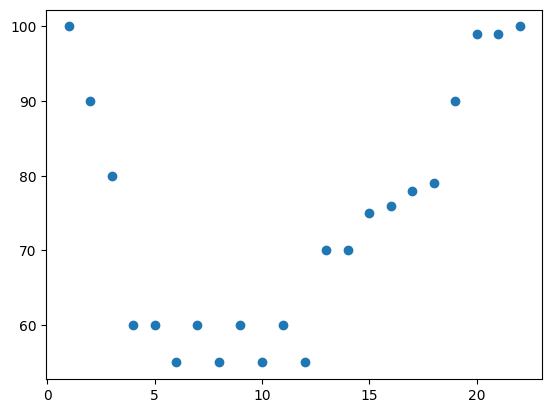

In [22]:
plt.scatter(X, y)

In [26]:
regLin = LinearRegression().fit(X.reshape(-1, 1), y)

In [52]:
regPloly = PolynomialFeatures(2).fit_transform(X.reshape(-1, 1))

In [53]:
# autre solution
X_poly = PolynomialFeatures(2).fit_transform(X.reshape(-1, 1))
regPoly = LinearRegression().fit(X_poly, y)

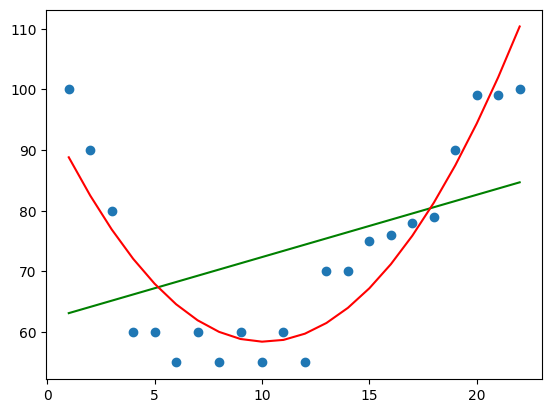

In [54]:
plt.scatter(X, y)
plt.plot(X, regLin.predict(X.reshape(-1, 1)), c="green")
plt.plot(X, regPoly.predict(X_poly), c="red")

In [51]:
print(regLin.score(X.reshape(-1, 1), y)*100)
print(regPoly.score(X_poly, y)*100)

16.510149989459876
97.83325361467955


In [2]:
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
df = sns.load_dataset("car_crashes")
# lr = LinearRegression()
# svr = svm.SVR(kernel="linear")
# knn = KNeighborsRegressor()
# sgd = SGDRegressor()
X = df[['speeding', 'alcohol', 'not_distracted', 'no_previous']]
y = df["total"]
lr = LinearRegression()
svr = svm.SVR(kernel="linear")
knn = KNeighborsRegressor()
sgd = SGDRegressor()

lr.fit(X, y)
svr.fit(X, y)
knn.fit(X, y)
sgd.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)
knn.fit(X_train, y_train)
sgd.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(svr.score(X_train, y_train))
print(knn.score(X_train, y_train))
print(sgd.score(X_train, y_train))

0.9684904125617236
0.966050404369203
0.9270480928755817
0.8746037733912582


In [3]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=KNeighborsRegressor(), param_grid={"n_neighbors":range(1,20),  "metric":["minkowski", "manhattan", "euclidean"]})

grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 20)})

In [4]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [5]:
grid.best_estimator_.values()

KNeighborsRegressor(metric='manhattan', n_neighbors=3)

In [9]:
grid.score(X_train, y_train)

0.9561223846561576

In [8]:
grid.score(X_test, y_test)

0.8287526147972135

### K FOLD   
PREPROCESSING

In [39]:
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
df = sns.load_dataset("car_crashes")
# lr = LinearRegression()
# svr = svm.SVR(kernel="linear")
# knn = KNeighborsRegressor()
# sgd = SGDRegressor()
X = df[['speeding', 'alcohol', 'not_distracted', 'no_previous']]
y = df["total"]
# le but est d'avoir le données les plus performantes afin d'avoir ensuite de meilleurs résulats

from sklearn.model_selection import KFold, cross_val_score

In [42]:
# le nombre de kfold est arbitraire, par convention on a 5
KF = KFold(n_splits = 10, shuffle = True, random_state =42)

In [37]:
KF.__format__

<function KFold.__format__(format_spec, /)>

In [43]:
cpt=1
listeTrain = []
listeTest=[]
for trainIndex, testIndex in KF.split(X, y):
    print(f" fold :{cpt} pour train la  taille: {len(trainIndex)} et taille : {len(testIndex)}")
    listeTrain.append(trainIndex)
    listeTest.append(testIndex)
    cpt+=1

 fold :1 pour train la  taille: 45 et taille : 6
 fold :2 pour train la  taille: 46 et taille : 5
 fold :3 pour train la  taille: 46 et taille : 5
 fold :4 pour train la  taille: 46 et taille : 5
 fold :5 pour train la  taille: 46 et taille : 5
 fold :6 pour train la  taille: 46 et taille : 5
 fold :7 pour train la  taille: 46 et taille : 5
 fold :8 pour train la  taille: 46 et taille : 5
 fold :9 pour train la  taille: 46 et taille : 5
 fold :10 pour train la  taille: 46 et taille : 5


In [34]:
listeTrain[1]

array([ 0,  1,  2,  3,  5,  7,  9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 50])

In [32]:
listeTest[1]

array([ 4,  6,  8, 15, 19, 33, 36, 47, 48, 49])

In [20]:
grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid={
                    "n_neighbors": range(1, 20),  "metric": ["minkowski", "manhattan", "euclidean"]})


In [64]:
# le nombre de kfold est arbitraire, par convention on a n_splits=5
KF = KFold(n_splits=10, shuffle=True, random_state=42)
cpt=1
for trainIndex, testIndex in KF.split(X, y):
    grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid={
        "n_neighbors": range(1, 10),  "metric": ["minkowski", "manhattan", "euclidean"]})
    grid.fit(X.iloc[trainIndex,:], y.iloc[trainIndex ])
    print(f" pour le fold :{cpt} le taux de prediction est {grid.score(
        X.iloc[trainIndex, :], y.iloc[trainIndex]):.2f} les meilleurs parametres:{grid.best_params_.values()}")
    # print(f"pour fold :{cpt} le score :{grid.score(
    #     X.iloc[trainIndex, :], y.iloc[trainIndex])} ")
    # print(f" pour fold :{cpt} les meilleurs parametres:{grid.best_params_} ")
    cpt+=1

 pour le fold :1 le taux de prediction est 0.97 les meilleurs parametres:dict_values(['minkowski', 2])
 pour le fold :2 le taux de prediction est 0.98 les meilleurs parametres:dict_values(['manhattan', 2])
 pour le fold :3 le taux de prediction est 0.97 les meilleurs parametres:dict_values(['manhattan', 2])
 pour le fold :4 le taux de prediction est 0.97 les meilleurs parametres:dict_values(['manhattan', 2])
 pour le fold :5 le taux de prediction est 0.98 les meilleurs parametres:dict_values(['manhattan', 2])
 pour le fold :6 le taux de prediction est 0.97 les meilleurs parametres:dict_values(['manhattan', 2])
 pour le fold :7 le taux de prediction est 0.93 les meilleurs parametres:dict_values(['manhattan', 4])
 pour le fold :8 le taux de prediction est 0.97 les meilleurs parametres:dict_values(['manhattan', 2])
 pour le fold :9 le taux de prediction est 0.95 les meilleurs parametres:dict_values(['manhattan', 4])
 pour le fold :10 le taux de prediction est 0.98 les meilleurs parametres

### titanic

In [88]:

import seaborn as sns
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans


df = sns.load_dataset("titanic")

In [95]:
df=df.dropna()
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [96]:
X = ['pclass', 'sex', 'age', 'class',  'embark_town']
y = ['survived']

In [97]:
# trnasformatin colonnes sex
df['sex']=df['sex'].replace(["male", "female"], [0,1])

In [98]:
# transformation colonne embark
pd.get_dummies(df['embark_town'])

,Cherbourg,Queenstown,Southampton
1,True,False,False
3,False,False,True
6,False,False,True
10,False,False,True
11,False,False,True
...,...,...,...
871,False,False,True
872,False,False,True
879,True,False,False
887,False,False,True


In [99]:
df_total=pd.concat([df, pd.get_dummies(df['embark_town'])], axis=1).drop("embark_town", axis=1)

df_total.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,Cherbourg,Queenstown,Southampton
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,True,False,False


In [102]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=42, n_init=10)


In [103]:

kmeans.fit(df_total)

ValueError: could not convert string to float: 'C'

In [105]:
# print(OneHotEncoder().fit_transform(df['embark_town']))

#### pipeline

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic")

titanicPipeline = df[['survived','pclass',  'age',   'fare']].dropna()
y = ['survived']

In [116]:

X_train, y_train, X_test, y_test= train_test_split(
    titanicPipeline.drop("survived", axis=1),
    titanicPipeline.survived,
    test_size=0.3,
    random_state=24)


In [123]:
preprocessing=ColumnTransformer(
    transformers= [
        ("standardisation", StandardScaler(), ["fare"])
    ]
)
model=SVC()
# Entraînement du modèle
# model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
# predictions = model.predict(X_test)

pipe=Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("classifier", model)
    ]
)